<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev_Report2017/WorldHappinessReport_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2017 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)

DistributionObj = Distribution(happiness2017)
CorrelationObj = Correlation(dataset=happiness2017)

happiness2017.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [2]:
happiness2017.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 23.3 KB


In [3]:
happiness2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


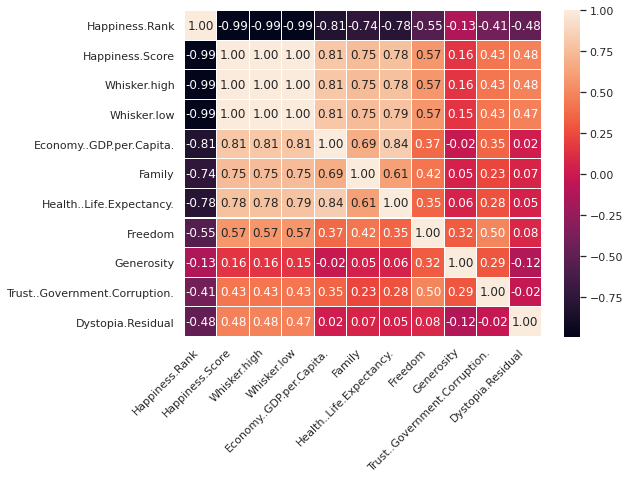

In [4]:
CorrelationObj.addCorrelationmap

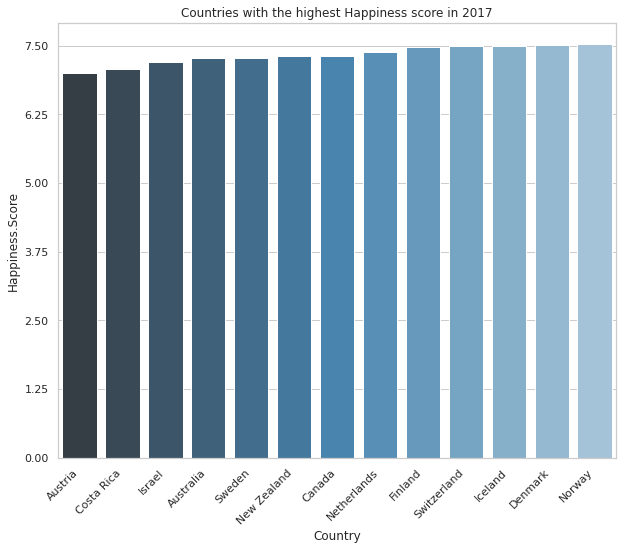

In [5]:
# Countries with the highest Happiness score in 2017
Sortedhappiness2017 = happiness2017.sort_values(by='Happiness.Score')
Sortedhappiness2017Greaterthan7 = Sortedhappiness2017['Happiness.Score'] >= 7
Sortedhappiness2017Greaterthan7 = Sortedhappiness2017[Sortedhappiness2017Greaterthan7]

x_data= 'Country'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2017Greaterthan7, x=x_data,  y='Happiness.Score',palette='Blues_d'  )

g.set( xlabel='Country', ylabel='Happiness.Score', title='Countries with the highest Happiness score in 2017')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

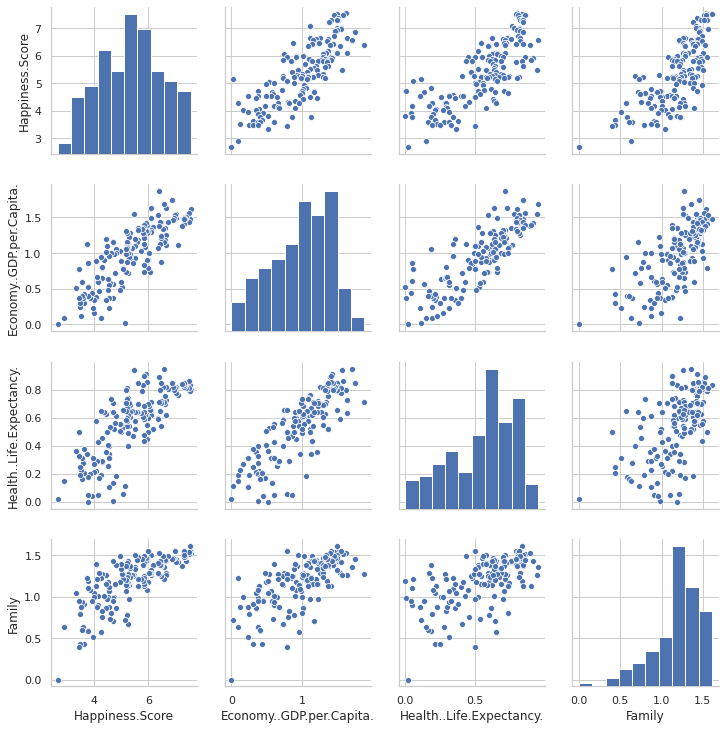

In [6]:
colNames = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Family']
sns.pairplot(happiness2017[colNames])
plt.show()

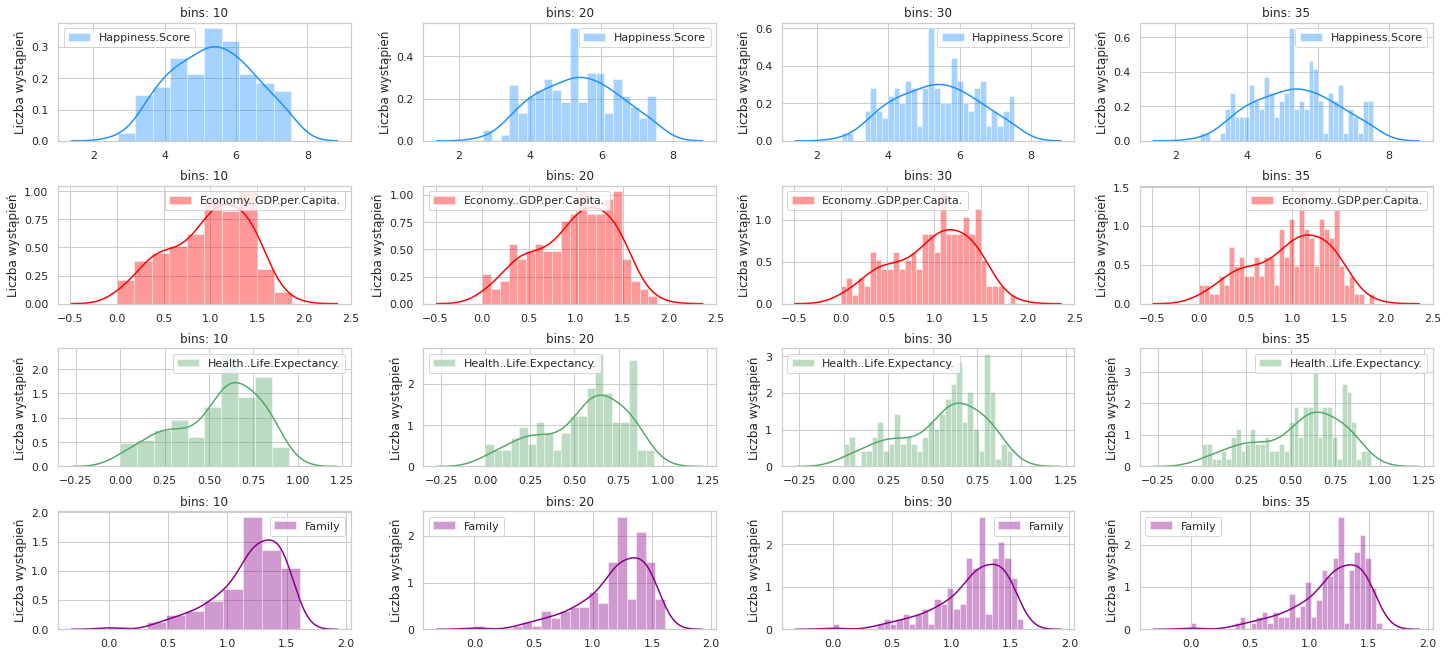

In [7]:
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames, bins=binsValues, set_width=20,  set_height=9)

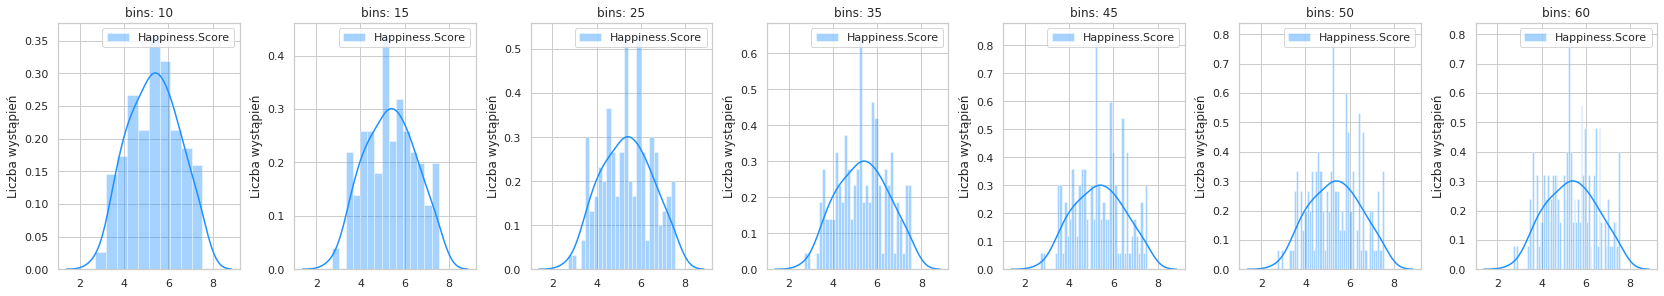

In [8]:
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames[0], bins=binsValues, set_width=23, set_height=4)

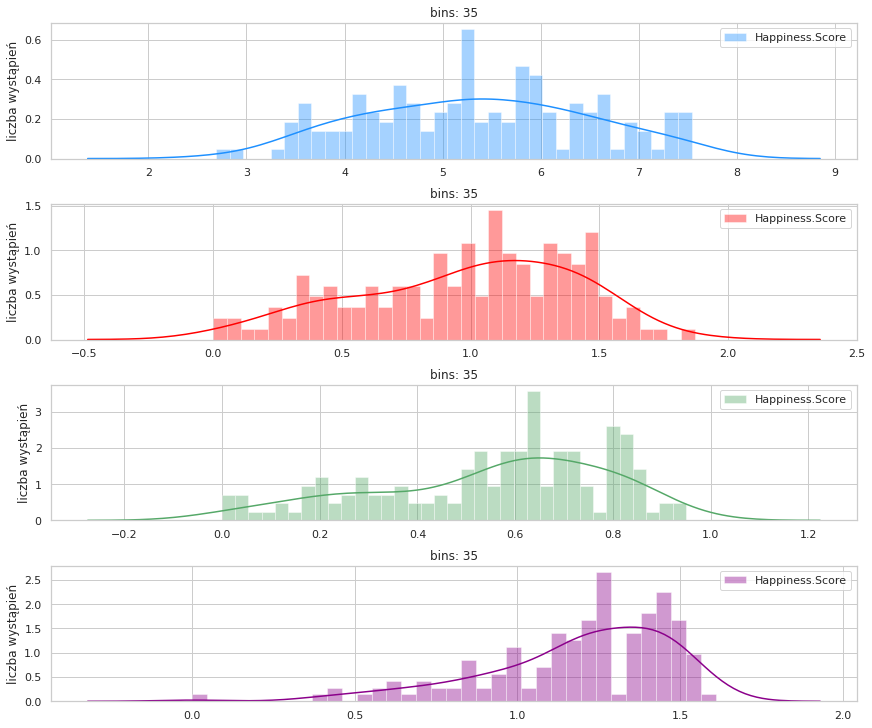

In [9]:
DistributionObj.addHist(value=colNames, bins=35, set_height=10, set_width=12 )

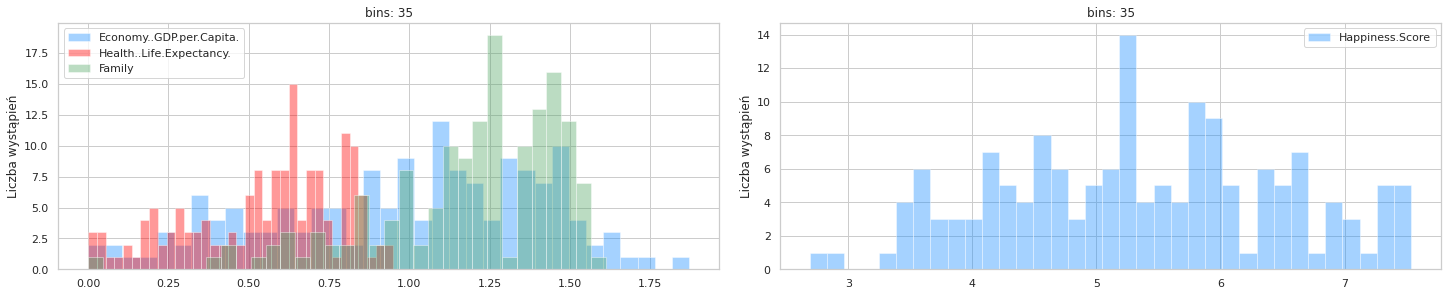

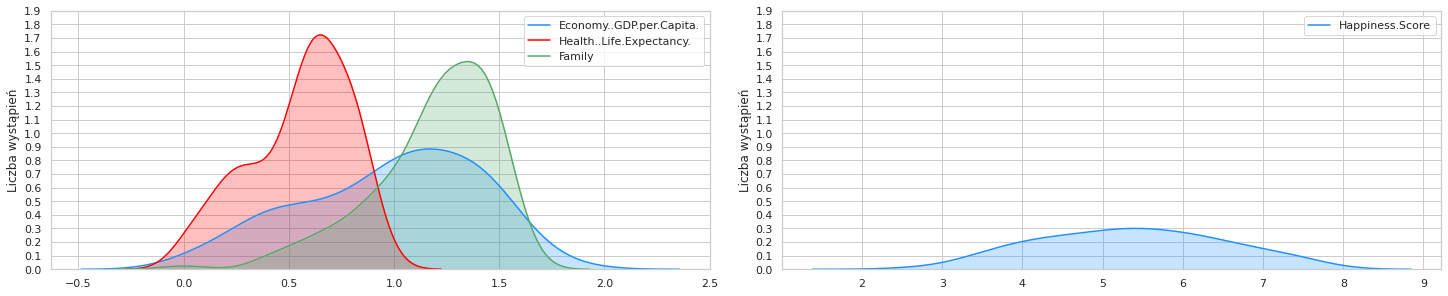

In [10]:
DistributionObj.addStackedHist(list= colNames, bins=35, set_width=20, set_height=4)
DistributionObj.addDensityDistribution(value=colNames, set_width=20, set_height=4)

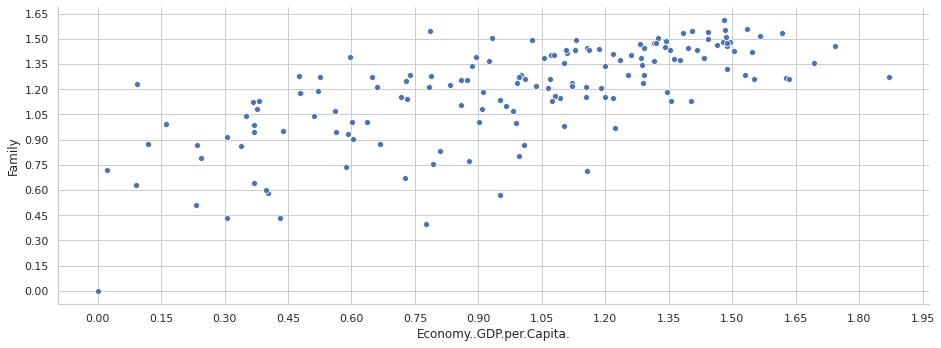

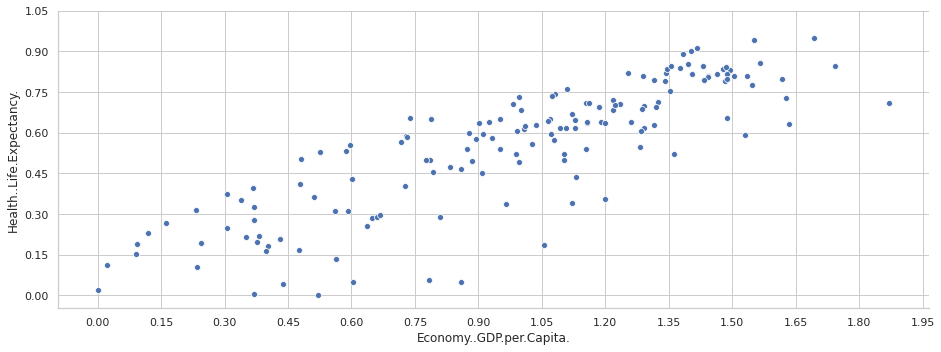

In [11]:
CorrelationObj.addScatterPlot(y_data='Family', x_data='Economy..GDP.per.Capita.', xstep=0.15, ystep=0.15, width=15, height=5)
CorrelationObj.addScatterPlot(y_data='Health..Life.Expectancy.', x_data='Economy..GDP.per.Capita.', xstep=0.15, ystep=0.15, width=15, height=5)

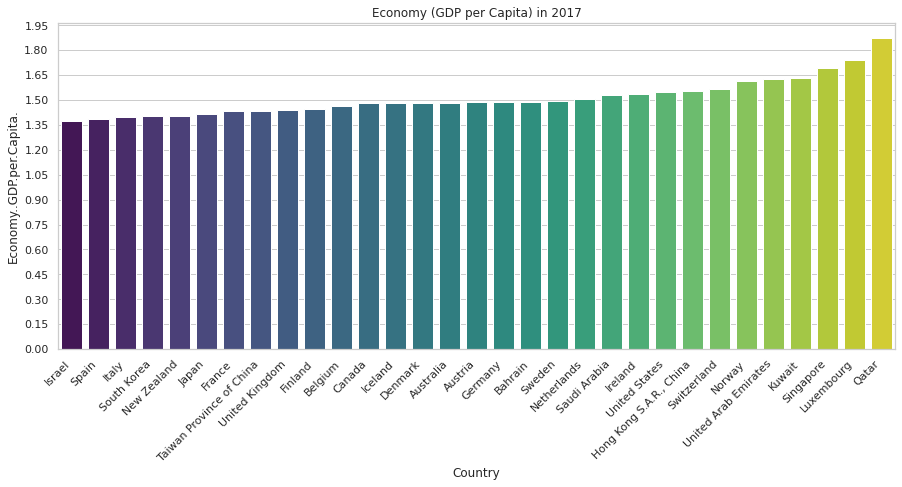

In [12]:
GDPperCapita_greaterThan1dota37 = happiness2017['Economy..GDP.per.Capita.'] >= 1.37

GDOP_data = happiness2017[GDPperCapita_greaterThan1dota37].sort_values(by='Economy..GDP.per.Capita.')

sns.set_style('whitegrid') 
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0, 2.15, step=0.15))

g = sns.barplot(  data=GDOP_data, x='Country',  y='Economy..GDP.per.Capita.',palette='viridis',  ci=None )

g.set( xlabel='Country', ylabel='Economy..GDP.per.Capita.', title='Economy (GDP per Capita) in 2017')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()